<a href="https://colab.research.google.com/github/krGaurav310/AllColabProjects/blob/master/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import tweepy
from textblob import TextBlob 
#from WordCloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [50]:
from wordcloud import WordCloud


In [51]:
# Twitter Api Credentials
Consumer_Key = "4eg6ytsqfCiNHP8I1aqa0le03"
Consumer_Secret_Key = "3sgIXK1ir1WIxUMBukdwI4DUyupC00DxMv3JUiLJDlkLVNR9tt"
Access_Token = "1282647220202827776-ki4lKdwS851lq9FKt7u2NfgeBgSDwB"
Access_Token_Secret = "44whpnVxT1eUbhRsncrpXIpgpvJ01CdlmJNiPpdk9m3gE"

In [52]:
#Authenticating Keys
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

#status = "Testing!"
#api.update_status(status=status)

In [53]:
posts = api.user_timeline(screen_name = "BillGates",count = 100, lang = "en", tweet_mode = "extended")

In [ ]:
#posts = api.user_timeline(screen_name = "BillGates", count = 100, len = "en", tweet_mode = "extended")

In [ ]:
posts

In [55]:
print("show the 5 recent tweets")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i= i + 1

show the 5 recent tweets
1) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year. @BernardOlayo founded @Hewa_Tele to address this often-overlooked challenge. https://t.co/TSea0oyDjP

2) This hero is playing a critical role in Kenya’s preparations to tackle COVID-19 by scaling up medical oxygen supplies that will be needed to keep the most critically ill patients alive. https://t.co/U2YcRgzSDA

3) RT @MichelleObama: Here's what #Juneteenth means to me: https://t.co/KlOoYwdzD5

4) RT @NavigatingNikki: “It’s that clarity of language about the VALUE of black life in America that distinguishes #Juneteenth as emancipation…

5) RT @nationalbook: "And I’ll never lose my faith that you and I can create an anti-racist America where racial disparities are nonexistent.…



In [56]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

In [57]:
df.head()

,Tweets
0,"Globally, a lack of medical oxygen–needed to t..."
1,This hero is playing a critical role in Kenya’...
2,RT @MichelleObama: Here's what #Juneteenth mea...
3,RT @NavigatingNikki: “It’s that clarity of lan...
4,"RT @nationalbook: ""And I’ll never lose my fait..."


In [58]:
#clean the text

#create a function to clean the text

def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]', '', text) # removed @mentions
  text = re.sub(r'#', '', text) # removing the '#' symbol 
  text = re.sub(r'RT[\s]+','', text) #removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #remove the hyper link

  return text

In [59]:
#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [60]:
#show the cleaned text
df.head()

,Tweets
0,"Globally, a lack of medical oxygen–needed to t..."
1,This hero is playing a critical role in Kenya’...
2,ichelleObama: Here's what Juneteenth means to ...
3,avigatingNikki: “It’s that clarity of language...
4,"ationalbook: ""And I’ll never lose my faith tha..."


In [61]:
#Create a functiopn to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns for subjectivity and polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [62]:
#Now show the new dataframe with the two new columns

df.head()

,Tweets,Subjectivity,Polarity
0,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667
1,This hero is playing a critical role in Kenya’...,0.540000,0.020000
2,ichelleObama: Here's what Juneteenth means to ...,0.000000,0.000000
3,avigatingNikki: “It’s that clarity of language...,0.433333,-0.166667
4,"ationalbook: ""And I’ll never lose my faith tha...",0.000000,0.000000


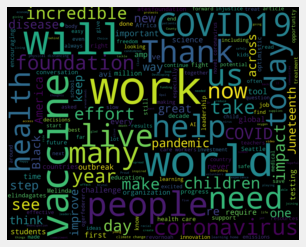

In [63]:
#plot the word cloud 

allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 2500, height =2000, random_state = 101, max_font_size = 400).generate(allwords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [64]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the dataframe

df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667,negative
1,This hero is playing a critical role in Kenya’...,0.540000,0.020000,Positive
2,ichelleObama: Here's what Juneteenth means to ...,0.000000,0.000000,Neutral
3,avigatingNikki: “It’s that clarity of language...,0.433333,-0.166667,negative
4,"ationalbook: ""And I’ll never lose my faith tha...",0.000000,0.000000,Neutral


In [ ]:
#Print all the positive tweets

j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

In [74]:
sortedDF.head()

,Tweets,Subjectivity,Polarity,Analysis
18,elindagates: The video of George Floyd’s bruta...,1.0000,-0.8750,negative
85,Game on!,0.4000,-0.5000,negative
12,"upita_Nyongo: 1. This is Opal Lee, the force b...",0.7000,-0.4000,negative
15,"…in policing, criminal justice, education, hea...",0.4625,-0.2625,negative
8,va: “Only those feigning blindness fail to see...,0.6500,-0.2500,negative


In [75]:
#Print all the Negative tweets

j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending= 'False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'negative'):
      print(str(j) + ') ' + sortedDF['Tweets'][i])
      print()
      j = j + 1  

1) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year. ernardOlayo founded ewa_Tele to address this often-overlooked challenge. 

2) avigatingNikki: “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

3) va: “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

4) aejemison: Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Genera…

5) upita_Nyongo: 1. This is Opal Lee, the force behind the movement to make Juneteenth a national holiday. Also known as Freedom Day, it…

6) …in policing, criminal justice, education, health care, housing, the workplace and all other areas of their lives.

7) The horrifying killings of George Floyd, Ahmaud Arbery, Breonna Taylor and far too many other Blac

Text(0, 0.5, 'Subjectivity')

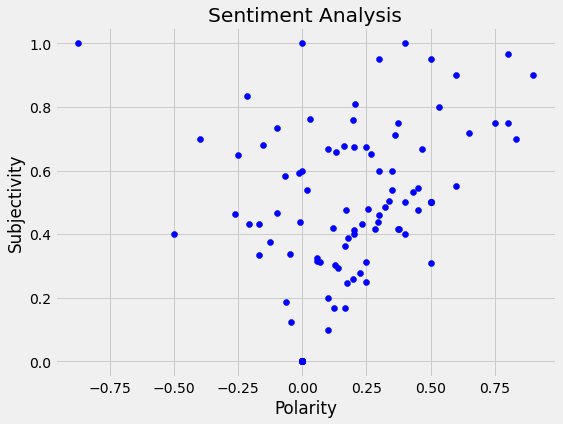

In [81]:
plt.figure(figsize=(8,6))
for i in range(0 , df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color= 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [86]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

#ptweets
round( (ptweets.shape[0]/df.shape[0]) * 100, 1)

68.0

In [88]:
#Get the percentage of negative tweets
ptweets = df[df.Analysis == 'negative']
ptweets = ptweets['Tweets']

#ptweets
round( (ptweets.shape[0]/df.shape[0]) * 100, 1)

19.0

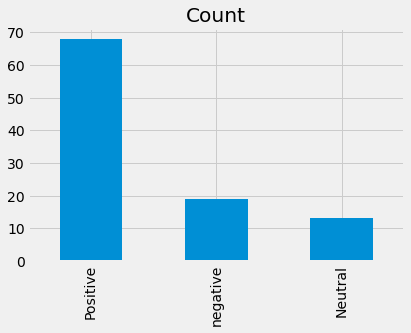

In [89]:
#show the value count
df['Analysis'].value_counts()

#plot and visualize the counts

plt.title('Sentiment Analysis')
plt.title('Sentiment')
plt.title('Count')

df['Analysis'].value_counts().plot(kind = 'bar')

plt.show()

